## Data Scientist Interview Question(s) Part 2
### Regression
https://docs.google.com/spreadsheets/d/1AV-A1uhQqvF6h0_a-fupFQIHv6W7-vNm88AYh_WzeB0/edit#gid=1326833441

You will find Q2 regression data from the link above. 

The data contains 300 rows and 3 columns (from the left, A, B, and C). Please build a good regression model which explains column C by a function of  A and B. 

Note: Please do not use any ML libraries or packages. You can simply attach plot of data points and your regression model that fits the data points and of course, code point (preferably Github).
Provide a link to your code/explanation.

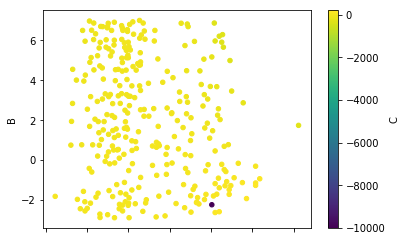

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# read the spreadsheet and drop duplicates and NA
google_sheet_url = 'https://docs.google.com/spreadsheets/d/1AV-A1uhQqvF6h0_a-fupFQIHv6W7-vNm88AYh_WzeB0/export?format=csv&gid=1646189991'
df = pd.read_csv(google_sheet_url, header = None)
df.drop_duplicates(inplace = True)
df.dropna()
# rename columns and plot
df.rename(columns={0: "A", 1: "B", 2: "C"}, inplace=True)
df.plot.scatter(x='A', y='B', c='C', colormap='viridis')

### Outlier
One EXTREME outlier is present, take it out before fitting, feature distribution looks more reasonable

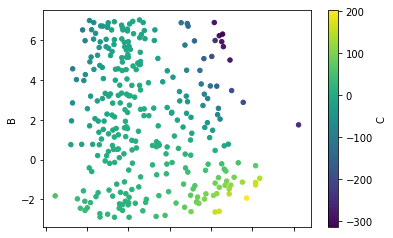

In [2]:
df = df[abs(df['C']) < 2000]
df.plot.scatter(x='A', y='B', c='C', colormap='viridis')

### After a few trial and error, 3rd order polynomial fit is sufficient

In [3]:
df['A^2'] = df['A']**2
df['B^2'] = df['B']**2
df['A*B'] = df['A'] * df['B']
df['A^3'] = df['A']**3
df['B^3'] = df['B']**3
df['A^2*B'] = df['A']**2 * df['B']
df['A*B^2'] = df['B']**2 * df['A']
df.head()

,A,B,C,A^2,B^2,A*B,A^3,B^3,A^2*B,A*B^2
0,0.490,-0.18,11.50,0.240100,0.0324,-0.08820,0.117649,-0.005832,-0.043218,0.015876
1,-1.410,-1.23,11.80,1.988100,1.5129,1.73430,-2.803221,-1.860867,-2.445363,-2.133189
2,0.943,4.51,-3.24,0.889249,20.3401,4.25293,0.838562,91.733851,4.010513,19.180714
3,3.570,5.07,-23.90,12.744900,25.7049,18.09990,45.499293,130.323843,64.616643,91.766493
4,-1.700,6.91,-22.10,2.890000,47.7481,-11.74700,-4.913000,329.939371,19.969900,-81.171770


In [4]:
# prepare X and Y
X = df[['A','B','A^2','B^2','A*B','A^2*B','A*B^2','A^3','B^3']].values
Y = df['C'].values
ones = np.ones(X.shape[0])[:, None]
X = np.concatenate((ones, X), axis=1)

### Not many data points
Use close form normal equation

In [5]:
# model coeffs
theta = np.linalg.pinv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)

In [6]:
# evaluate model performance with R^2
y_pred = X.dot(theta)
ssr = np.sum((y_pred - Y)**2)
sst = np.sum((Y - np.mean(Y))**2)
r2_score = 1 - (ssr/sst)
r2_score

0.999980864374674